In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<b>9.1</b> A coin is thrown independently 10 times to test the hypothesis that the probability
of heads is 1/2 versus the alternative that the probability is not 1/2 . The test rejects
if either 0 or 10 heads are observed.

<b>a.</b> What is the significance level of the test?

significance level $= \mathbb{P}(\text{type I error}) = \mathbb{P}(\text{0 heads}) + \mathbb{P}(\text{10 heads})$

In [2]:
from scipy.stats import binom
binom.pmf(0,10,0.5) + binom.pmf(10,10,0.5)

0.001953125

<b>b.</b> If in fact the probability of heads is .1, what is the power of the test?

power $= \mathbb{P}(\text{reject } H_0 \text{when it is false})$ 

In [3]:
binom.pmf(0,10,0.1) + binom.pmf(10,10,0.1)

0.34867844019999994

<b>9.3</b> Suppose that X ∼ bin(100, p). Consider the test that rejects $H_0$ : p = .5 in favor
of $H_A$ : p $\neq$ .5 for |X − 50| > 10. Use the normal approximation to the binomial
distribution to answer the following:

<b>a.</b> What is α?

In [4]:
from scipy.stats import norm
2*norm.cdf(40,50,5)

0.045500263896358389

<b>b.</b> Graph the power as a function of p.

/home/chuphay/anaconda3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1635: RuntimeWarning: divide by zero encountered in true_divide
  x = (x-loc)*1.0/scale


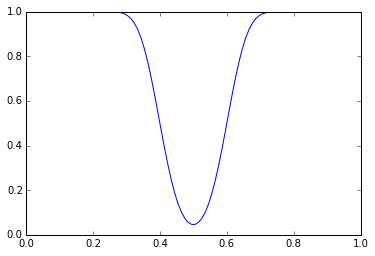

In [5]:
p = linspace(0,1,100)
def reject(p):
    return norm.cdf(40,100*p,sqrt(100*p*(1-p))) + 1 - norm.cdf(60,100*p,sqrt(100*p*(1-p)))
plot(p,reject(p));

<b>9.4</b> Let X have one of the following distributions:
<table>
  <tr>
    <td>$X$</td>
    <td>$H_0$</td> 
    <td>$H_A$</td>
  </tr>
  <tr>
    <td>$x_1$</td>
    <td>.2</td> 
    <td>.1</td>
  </tr>
    <tr>
    <td>$x_2$</td>
    <td>.3</td> 
    <td>.4</td>
  </tr>
    <tr>
    <td>$x_3$</td>
    <td>.3</td> 
    <td>.1</td>
  </tr>
    <tr>
    <td>$x_4$</td>
    <td>.2</td> 
    <td>.4</td>
  </tr>
</table>

<b>a.</b> Compare the likelihood ratio, $\Lambda$, for each possible value X and order the $x_i$
according to $\Lambda$.

In [6]:
h_0 = array([0.2,0.3,0.3,0.2])
h_a = array([0.1,0.4,0.1,0.4])
h_0/h_a

array([ 2.  ,  0.75,  3.  ,  0.5 ])

So the order is $x_3,x_1,x_2,x_4$

<b>b.</b> What is the likelihood ratio test of $H_0$ versus $H_A$ at level α = .2? What is the
test at level α = .5?

When $\Lambda$ is small, we reject $H_0$ Given that $H_0$ is true, what value of $\lambda$ gives 

$$\mathbb{P}(\text{reject } H_0|H_0) = 0.2$$ 

For $\alpha = 0.2$ clearly if $\lambda$ is less than 0.5, we accept the null hypothesis always. Therefore we must look for a $\lambda$ bigger than 0.5. If $\lambda$ equals 0.75, then we reject $H_0$ in two cases, which means that $\alpha$ is 0.5, which is too big. Therefore, $0.5 \leq \lambda < 0.75$ 

For $\alpha =0.5$, we can use similar logic and say $0.75 \leq \lambda < 2$ 

<b>c.</b> If the prior probabilities are $P(H_0 ) = P(H_A )$, which outcomes favor $H_0$ ?

Clearly, when $\lambda >1$ we choose $H_0$, therefore, $x_3$ and $x_1$.

<b>d.</b> What prior probabilities correspond to the decision rules with α = .2 and
α = .5?

For $\alpha = 0.2$, we can have priors anywhere between $P(H_0 ) = 1/3 , P(H_A )  = 2/3$ and $P(H_0 ) = 3/7 , P(H_A )  = 4/7$

For $\alpha = 0.5$, we can have priors anywhere between $P(H_0 ) = 3/7 , P(H_A )  = 4/7$ and $P(H_0 ) = 2/3 , P(H_A )  = 1/3$

<b>9.6</b> Consider the coin tossing example of Section 9.1. Suppose that instead of tossing
the coin 10 times, the coin was tossed until a head came up and the total number
of tosses, X , was recorded.

<b>a.</b> If the prior probabilities are equal, which outcomes favor $H_0$ and which favor
$H_1$ ?

In [7]:
x = array([i for i in range(1,11)])
import pandas as pd
df = pd.DataFrame([0.5*(0.5)**(x-1),0.7*(0.3)**(x-1)])
df.columns = x
df

,1,2,3,4,5,6,7,8,9,10
0,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.007812,0.003906,0.001953,0.000977
1,0.7,0.21,0.063,0.0189,0.00567,0.001701,0.000510,0.000153,0.000046,0.000014


We can see from the above that the only outcome that favors $H_1$ is when the first flip is heads. All other possibilities favor $H_0$.

<b>b.</b> Suppose $P(H_0 )/P(H_1 ) = 10$. What outcomes favor $H_0$ ?

In [8]:
df[:2] = df[:2]/10
df

,1,2,3,4,5,6,7,8,9,10
0,0.05,0.025,0.0125,0.00625,0.003125,0.001563,0.000781,0.000391,0.000195,0.000098
1,0.07,0.021,0.0063,0.00189,0.000567,0.000170,0.000051,0.000015,0.000005,0.000001


We can see from the above, that now we favor $H_0$ for every outcome.

<b>c.</b> What is the significance level of a test that rejects $H_0$ if X ≥ 8?

$\alpha$ = significance level = $\mathbb{P}(\text{reject } H_0 \text{when it is true})$ 

Clearly then, we sum all the probabilities below 7 (because 8 is the first heads):


In [14]:
x = array(range(1,8))
1 -sum(0.5*(0.5)**(x-1))

0.0078125

<b>d.</b> What is the power of this test?

In [15]:
x = array(range(1,8))
1 -sum(0.7*(0.3)**(x-1))

0.0002187000000000161

<b>9.7</b> Let $X_1 , . . . , X_n$ be a sample from a Poisson distribution. Find the likelihood ratio
for testing $H_0 : λ = λ_0$ versus $H_A : λ = λ_1$ , where $λ_1 > λ_0$ . Use the fact that the
sum of independent Poisson random variables follows a Poisson distribution to
explain how to determine a rejection region for a test at level α.

The likelihood ratio is defined as

$$\Lambda = \frac {lik(\lambda_0)}{lik(\lambda_1)}$$

Thus,
$$\Lambda = \left(\frac {\lambda_0}{\lambda_1} \right)^{n \bar{X}}e^{n(\lambda_1 - \lambda_0)}$$

Where we reject $H_0$ when $\Lambda$ is smaller than $\alpha$.

We already know that $λ_1 > λ_0$ and therefore as $\bar{X}$ gets bigger, we would be more likely to reject the null hypothesis.

$$\alpha = \mathbb{P}(\bar{X}>c | \lambda_0) = 1 - \mathbb{F}(c)$$

Where $\mathbb{F}$ is the cdf of a Poisson distribution, with parameter $nλ_0$.

<b>9.8</b> Show that the test of Problem 7 is uniformly most powerful for testing $H_0 : λ = λ_0$
versus $H_A : λ > λ_0$ . 

By the Neyman-Pearson Lemma, we have

Suppose that $H_0$ and $H_1$ are simple hypotheses and that the test that rejects $H_0$
whenever the likelihood ratio is less than c and significance level α. Then any
other test for which the significance level is less than or equal to α has power
less than or equal to that of the likelihood ratio test.

Clearly, for our problem, even though the alternative is a composite, all individual simple alternatives (i.e., pick any $\lambda>\lambda_0$) is most powerful and therefore we say that the test is uniformly most powerful.

<b>9.11</b> Suppose that $X_1 , . . . , X_{25}$ form a random sample from a normal distribution having a variance of 100. Graph the power of the likelihood ratio test of $H_0 : μ = 0$
versus $H_A : μ \neq 0$ as a function of μ, at significance levels .10 and .05. Do the
same for a sample size of 100. Compare the graphs and explain what
you see.

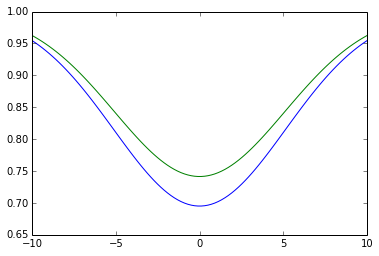

In [52]:
p = linspace(-10,10,100)
def reject(p, cutoff ,samples):
    return norm.cdf(p-cutoff,0,sqrt(samples)) + 1 - norm.cdf(p+cutoff,0,sqrt(samples))
plot(p,reject(p, 1.96,25));
plot(p,reject(p, 1.65,25))

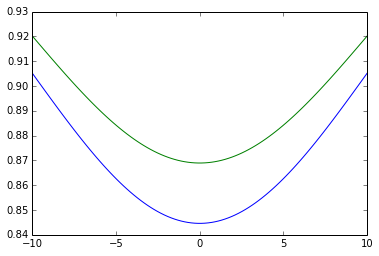

In [53]:
plot(p,reject(p, 1.96,100));
plot(p,reject(p, 1.65,100))